<a href="https://colab.research.google.com/github/Vasu-Raghuvanshi/Data-Analysis-1/blob/main/DataAnalysisDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis using Pandas profiling

In [5]:
# !pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
report = ProfileReport(df)
report.to_file(output_file="housing.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ydata_profiling/profile_report.py:379: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#EDA

### Exploratory Data Analysis
* **Univariate Analysis:** Examining the distribution of a single variable.  
* **Bivariate Analysis:** Analyzing relationships between two variables.  
* **Multivariate Analysis:** Studying interactions among multiple variables.  
* **Time Series Analysis:** Evaluating trends and patterns over time.  
* **Missing Data Analysis:** Identifying and handling incomplete data.  
* **Outlier Detection:** Finding and addressing extreme values in data.

In [ ]:

#Imports Dataset from Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1


In [ ]:
#Performing Data Analysis

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
df.isnull().sum() #Finds null values in dataset

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
#These null values should be removed as dataset gives error with these values especially in linear regression and k-means in ML
#Removing Null
df['Postal Code'].fillna(df['Postal Code'].mean(),inplace=True)
df.isnull().sum() #null values removed

<ipython-input-5-6fbfa51eccf8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mean(),inplace=True)


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#After Removing nulls,Analysing the data
df['Category'].value_counts()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


In [ ]:
df['Sub-Category'].value_counts()

(Sub-Category
 Binders        1492
 Paper          1338
 Furnishings     931
 Phones          876
 Storage         832
 Art             785
 Accessories     756
 Chairs          607
 Appliances      459
 Labels          357
 Tables          314
 Envelopes       248
 Bookcases       226
 Fasteners       214
 Supplies        184
 Machines        115
 Copiers          66
 Name: count, dtype: int64,)

In [ ]:
df['State'].value_counts().head()

,count
State,
California,1946
New York,1097
Texas,973
Pennsylvania,582
Washington,504


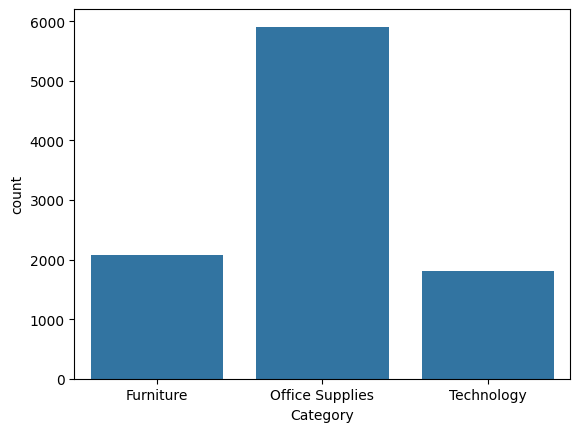

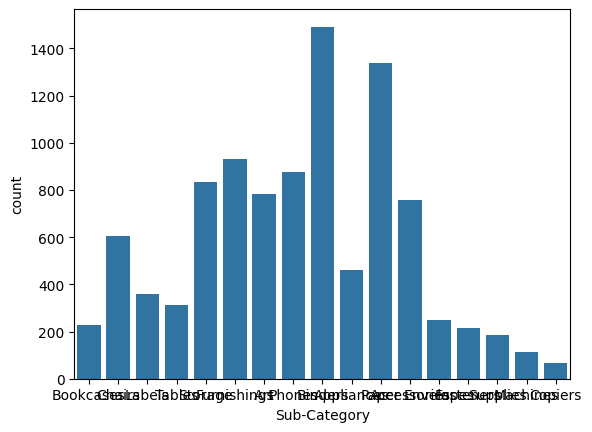

In [ ]:
#ploting graphs
#graph 1
sns.countplot(x="Category",data=df)
plt.show()

#graph2
sns.countplot(x="Sub-Category",data=df)
plt.show()

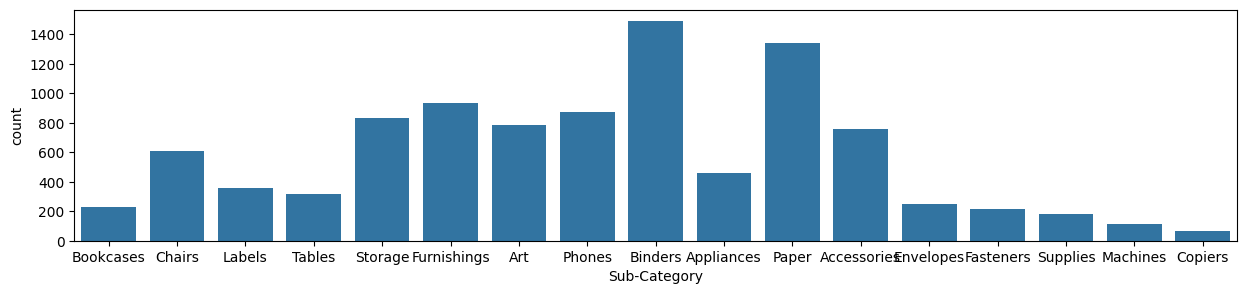

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,3)) #stretches the graph to clearly show overlapping values

#graph 2 with with clear x axis
sns.countplot(x="Sub-Category",data=df)
plt.show()
plt.savefig("Sub-Category-Graph")  #Saves graph as file

In [ ]:
#Ship Mode Pie chart
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5859
Second Class,1902
First Class,1501
Same Day,538


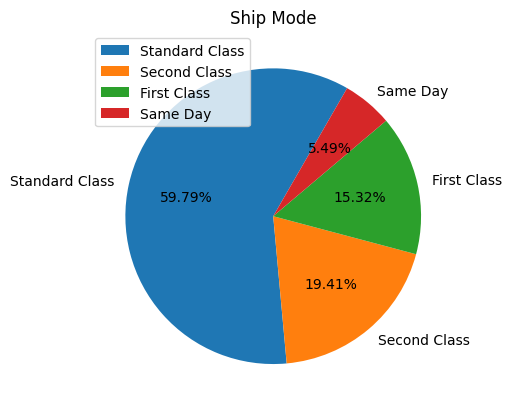

In [ ]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

plt.pie(y,labels = x, startangle=60, autopct="%0.2f%%")  #label sets label, startangle changes its angle,autopct sets percentage
plt.legend(loc=0) #loc sets it position ie 1,2,3
plt.title("Ship Mode")
plt.show()

### Bivarite

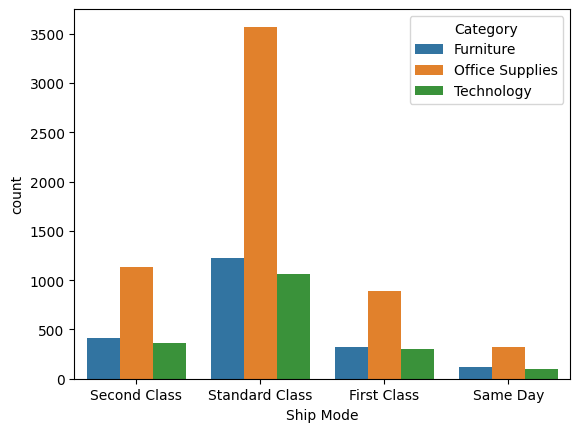

In [ ]:
sns.countplot(x="Ship Mode",data=df,hue="Category")
#hue parameter allows other params to be merged with each other
plt.show()

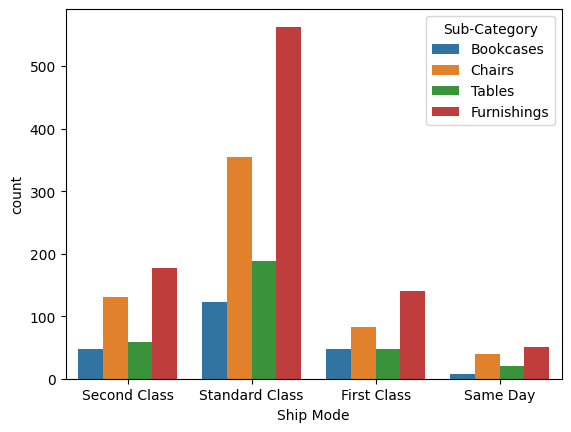

In [ ]:
sns.countplot(x="Ship Mode",data=df[df["Category"]=="Furniture"],hue="Sub-Category")
#hue parameter allows other params to be merged with each other
plt.show()

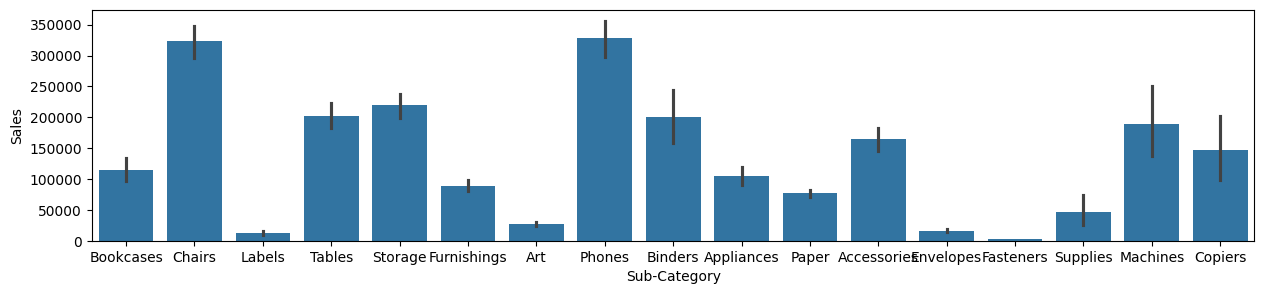

In [ ]:
plt.figure(figsize=(15,3))
#barplot allows to plot both x and y
sns.barplot(x="Sub-Category",y="Sales",data=df,estimator="sum")
plt.show()